In [2]:
from config import API_KEY

from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
ts = TimeSeries(key=API_KEY, output_format='pandas')
ti = TechIndicators(key=API_KEY, output_format='pandas')

In [4]:
ntnx, meta_data = ts.get_intraday('NTNX', interval='15min', outputsize='compact')

In [5]:
ntnx.sort_index(ascending=True, inplace=True)

# If converting to datetime
# For some reason, the plot funciton did not work as well on datetime
# ntnx.index = pd.to_datetime(ntnx.index)

In [6]:
meta_data

{'1. Information': 'Intraday (15min) open, high, low, close prices and volume',
 '2. Symbol': 'NTNX',
 '3. Last Refreshed': '2019-09-09 16:00:00',
 '4. Interval': '15min',
 '5. Output Size': 'Compact',
 '6. Time Zone': 'US/Eastern'}

In [7]:
ntnx.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-09-04 10:45:00,23.5704,23.585,23.475,23.5204,88546.0
2019-09-04 11:00:00,23.5200,23.540,23.370,23.3700,101067.0
2019-09-04 11:15:00,23.3900,23.560,23.380,23.4500,156441.0
2019-09-04 11:30:00,23.4400,23.545,23.400,23.5000,88915.0
2019-09-04 11:45:00,23.4908,23.560,23.440,23.4708,54977.0


### This would be a good time to rename the columns with:
`.rename(columns={"1. open": "open", etc})` <br>
In this notebook, it's done at a later time

In [9]:
ntnx_vol = ntnx['5. volume']

In [10]:
ntnx.drop(columns='5. volume', inplace=True)

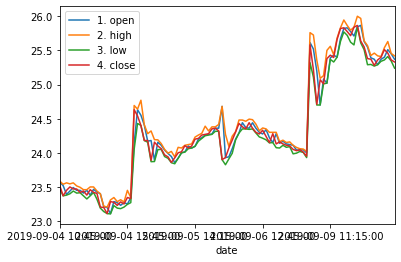

In [11]:
ntnx.plot()

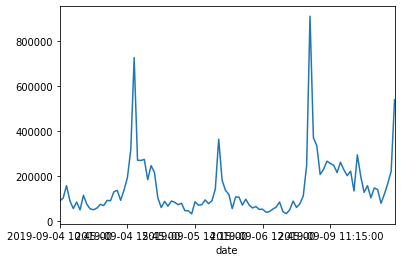

In [12]:
ntnx_vol.plot()

In [13]:
# # If collecting RSI data

# rsi, rsi_meta = ti.get_rsi('NTNX', interval='15min', time_period=7, series_type='close')

# # rsi.index = pd.to_datetime(rsi.index)

# # Match index range to the ntnx data
# rsi = rsi[rsi.index >= '2019-08-27 10:45']

# rsi.plot()

## The smas are based on the closing price

In [18]:
sma8, sma8_meta = ti.get_sma('NTNX', interval='15min', time_period=8, series_type='close')
sma13, sma13_meta = ti.get_sma('NTNX', interval='15min', time_period=13, series_type='close')

In [19]:
# Match index range to the ntnx data

sma8 = sma8[sma8.index >= '2019-08-27 10:45']
sma13 = sma13[sma13.index >= '2019-08-27 10:45']

In [20]:
sma8.head()

,SMA
date,
2019-08-27 10:45,19.7310
2019-08-27 11:00,19.7509
2019-08-27 11:15,19.7402
2019-08-27 11:30,19.7019
2019-08-27 11:45,19.6293


In [21]:
sma13.head()

,SMA
date,
2019-08-27 10:45,19.6065
2019-08-27 11:00,19.6334
2019-08-27 11:15,19.6368
2019-08-27 11:30,19.6301
2019-08-27 11:45,19.6201


In [22]:
smas = sma8.join(sma13, lsuffix='_8', rsuffix='_13')

In [23]:
type(smas.index)

pandas.core.indexes.base.Index

In [24]:
# smas.index = pd.to_datetime(smas.index)

In [25]:
smas.head()

,SMA_8,SMA_13
date,,
2019-08-27 10:45,19.7310,19.6065
2019-08-27 11:00,19.7509,19.6334
2019-08-27 11:15,19.7402,19.6368
2019-08-27 11:30,19.7019,19.6301
2019-08-27 11:45,19.6293,19.6201


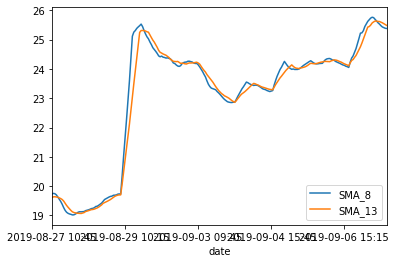

In [26]:
smas.plot()

In [27]:
# Remove last 3 characters from index string
# So the index matches smas
ntnx.index = ntnx.index.map(lambda x: x[:-3])

In [28]:
# If Joining to RSI
# full = ntnx.join(smas).join(rsi)

## Joining the price info with the indicator columns, and then creating a column to track relation of SMA 8 and 13

### This would be a good time to rename the columns with:
`.rename(columns={"1. open": "open", etc})` <br>
In this notebook, it's done at a later time

In [31]:
test_smas = ntnx.join(smas)

In [33]:
test_smas['8<13'] = test_smas.SMA_8<test_smas.SMA_13

In [71]:
test_smas.head()

,date,1. open,2. high,3. low,4. close,SMA_8,SMA_13,8<13,Buy
0,2019-09-04 10:45,23.5704,23.585,23.475,23.5204,23.3250,23.1548,False,0
1,2019-09-04 11:00,23.5200,23.540,23.370,23.3700,23.3943,23.1894,False,0
2,2019-09-04 11:15,23.3900,23.560,23.380,23.4500,23.4742,23.2289,False,0
3,2019-09-04 11:30,23.4400,23.545,23.400,23.5000,23.5530,23.2750,False,0
4,2019-09-04 11:45,23.4908,23.560,23.440,23.4708,23.5328,23.3220,False,0


In [37]:
# 2019-09-05 10:00 is where the first buy signal should be

In [63]:
# Reset index so we can use the integer index values later
test_smas.reset_index(inplace=True)
test_smas.head()

,date,1. open,2. high,3. low,4. close,SMA_8,SMA_13,8<13,Buy
0,2019-09-04 10:45,23.5704,23.585,23.475,23.5204,23.3250,23.1548,False,0
1,2019-09-04 11:00,23.5200,23.540,23.370,23.3700,23.3943,23.1894,False,0
2,2019-09-04 11:15,23.3900,23.560,23.380,23.4500,23.4742,23.2289,False,0
3,2019-09-04 11:30,23.4400,23.545,23.400,23.5000,23.5530,23.2750,False,0
4,2019-09-04 11:45,23.4908,23.560,23.440,23.4708,23.5328,23.3220,False,0


## Setting the trigger in the 'Buy' column

In [69]:
test_smas['Buy'] = 0

# Starting on index 2, so we can reference the two previous rows
# If sma8 < sma13 two rows ago, and sma8 > sma13 1 row ago,
# indicate "buy" on current row

for i in range(2, len(test_smas)+1):
    if (test_smas.loc[i-2, '8<13']) and (test_smas.loc[i-1, '8<13'] == False):
        test_smas.loc[i, 'Buy'] = 1


In [70]:
test_smas.head(30)

,date,1. open,2. high,3. low,4. close,SMA_8,SMA_13,8<13,Buy
0,2019-09-04 10:45,23.5704,23.5850,23.4750,23.5204,23.3250,23.1548,False,0
1,2019-09-04 11:00,23.5200,23.5400,23.3700,23.3700,23.3943,23.1894,False,0
2,2019-09-04 11:15,23.3900,23.5600,23.3800,23.4500,23.4742,23.2289,False,0
3,2019-09-04 11:30,23.4400,23.5450,23.4000,23.5000,23.5530,23.2750,False,0
4,2019-09-04 11:45,23.4908,23.5600,23.4400,23.4708,23.5328,23.3220,False,0
5,2019-09-04 12:00,23.4500,23.5150,23.4100,23.4700,23.4978,23.3739,False,0
6,2019-09-04 12:15,23.4500,23.4950,23.4150,23.4200,23.4715,23.4204,False,0
7,2019-09-04 12:30,23.4106,23.4600,23.3700,23.4406,23.4552,23.4689,True,0
8,2019-09-04 12:45,23.4510,23.4600,23.3243,23.3810,23.4378,23.5082,True,0
9,2019-09-04 13:00,23.3800,23.5000,23.3700,23.4600,23.4491,23.4949,True,0


### Rename columns to remove spaces, as well as rename DataFrame

In [81]:
smas = test_smas.rename(columns={"1. open": "open",
                                 "2. high": "high",
                                 "3. low": "low",
                                 "4. close": "close"})

In [97]:
# Get indexes where Buy is 1 (True)
buy_idxs = smas.index[smas['Buy']==1].tolist()
buy_idxs

[23, 42, 57, 75]

### Logic to enter a trade at open price and monitor for upper and lower bound triggers on this row and subsequent rows

In [104]:
# This creates an empty column that can accept tuples/lists
smas["W/L"] = pd.Series(dtype=object)

# Returns tuple of W or L plus the index where the trade was closed
for idx in buy_idxs:
    purch_price = smas.loc[idx, 'open']
    upper_lim = purch_price * 1.01
    lower_lim = purch_price * 0.997
    for i in range(idx, len(smas)+1):
        if (smas.loc[i, ["high", "low", "close"]]<=lower_lim).any():
            smas.at[idx, "W/L"] = ("L", i)
            break
        elif (smas.loc[i, ["high", "low", "close"]]>=upper_lim).any():
            smas.at[idx, "W/L"] = ("W", i)
            break
        elif i == len(smas):
            break

In [115]:
# Explore the columns containing buy signals
smas.loc[20:77]

,date,open,high,low,close,SMA_8,SMA_13,8<13,Buy,W/L
20,2019-09-04 15:45,23.2500,23.4500,23.2450,23.3450,23.2471,23.2960,True,0,NaN
21,2019-09-04 16:00,23.3400,23.3450,23.2700,23.3300,23.2634,23.2921,True,0,NaN
22,2019-09-05 09:45,24.1409,24.6929,24.0523,24.6309,23.4535,23.3822,False,0,NaN
23,2019-09-05 10:00,24.6300,24.6400,24.4300,24.5400,23.6104,23.4683,False,1,"(L, 23)"
24,2019-09-05 10:15,24.5500,24.7700,24.4000,24.4000,23.7510,23.5448,False,0,NaN
25,2019-09-05 10:30,24.4050,24.4100,24.1800,24.1800,23.8697,23.6198,False,0,NaN
26,2019-09-05 10:45,24.1708,24.2800,24.1550,24.1808,23.9822,23.6953,False,0,NaN
27,2019-09-05 11:00,24.1800,24.3200,23.8700,23.8900,24.0621,23.7553,False,0,NaN
28,2019-09-05 11:15,23.8909,24.1925,23.8722,24.1559,24.1634,23.8223,False,0,NaN
29,2019-09-05 11:30,24.1556,24.1900,24.0466,24.1006,24.2598,23.8858,False,0,NaN
